In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
df=pd.read_csv("/kaggle/input/churm-data/Churn_Modelling.csv")


In [12]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.duplicated().sum()

0

In [19]:
print(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [24]:
for i in df.columns:
    if df[i].dtype=="O":
        print(df[i].unique())
        print("="*10)
        print(df[i].value_counts())
        print("="*10)
        

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
['France' 'Spain' 'Germany']
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
['Female' 'Male']
Male      5457
Female    4543
Name: Gender, dtype: int64


In [28]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.shape

(10000, 11)

In [32]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [33]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [34]:
X=df.drop(columns="Exited")
y=df["Exited"]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [80]:
model=Sequential()
model.add(Dense(11,activation="sigmoid",input_dim=11))
model.add(Dense(11,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics="accuracy")

In [83]:
history_model=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.7742 - accuracy: 0.4636 - val_loss: 0.5604 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5219 - accuracy: 0.7934 - val_loss: 0.4961 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4950 - accuracy: 0.7934 - val_loss: 0.4803 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7934 - val_loss: 0.4661 - val_accuracy: 0.7987
Epoch 5/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.7934 - val_loss: 0.4506 - val_accuracy: 0.7987
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.7934 - val_loss: 0.4376 - val_accuracy: 0.7987
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.7955 - val_loss: 0.4291 - val_accuracy: 0.8094

In [84]:
model.layers[0].get_weights()

[array([[ 2.2203721e-01, -8.1499495e-02,  1.6291802e-01,  1.0625519e-01,
          5.9598265e-03, -1.6081962e-01,  2.8237060e-01,  6.4792645e-01,
         -7.9081342e-02, -1.0281148e-01,  1.3394313e-01],
        [-4.3122727e-01,  2.0861526e+00, -4.3762094e-01, -1.4342755e+00,
         -9.4869725e-02,  2.9700148e-01, -1.6867015e+00,  3.5282400e-01,
          6.7829114e-01, -1.6687464e+00, -1.5317863e+00],
        [ 2.9261336e-01, -1.0485418e-01,  1.3236415e-01, -2.1579508e-01,
         -8.6768270e-02,  9.6284613e-02, -6.4767486e-01,  2.3567039e-01,
         -2.2571953e-03,  2.6180053e-01,  2.2801144e-01],
        [-1.7110285e+00, -5.6761563e-01,  4.3838283e-01, -7.0891935e-01,
         -2.2320531e-01,  3.3399921e-02,  2.5485680e-01, -1.5990129e+00,
          8.1193763e-01, -1.0553558e-01, -6.5650159e-01],
        [-1.1593628e+00,  1.8507738e-01,  5.3362691e-01, -9.1690892e-01,
          9.6256334e-01, -8.9644283e-01, -6.9071257e-01, -9.2332399e-01,
          3.4627433e+00, -8.3100879e-0

In [85]:
model.layers[1].get_weights()

[array([[ 1.03738475e+00,  3.08289140e-01,  9.52344909e-02,
         -2.06746519e-01,  9.75270048e-02,  1.39602786e-03,
          9.92576480e-01, -5.72600186e-01,  3.99901301e-01,
          2.77152866e-01, -2.23494083e-01],
        [-3.20839435e-01, -2.39847019e-01, -9.77890253e-01,
          7.89227962e-01, -1.12820482e+00,  9.70245659e-01,
         -5.96905828e-01,  1.02188480e+00, -6.24143779e-01,
          7.49778807e-01,  5.91105163e-01],
        [-1.28289366e+00, -1.13789880e+00, -7.83547223e-01,
          9.21298087e-01, -1.10165000e+00,  7.69612491e-01,
         -1.10229278e+00,  6.29773736e-01, -1.38875949e+00,
          8.91129076e-01,  6.94518626e-01],
        [ 6.03752375e-01, -6.13208771e-01,  7.09308803e-01,
         -6.38504744e-01, -1.09944411e-01,  2.78659552e-01,
          8.40819776e-01, -3.49632919e-01,  3.93984377e-01,
         -8.50183740e-02, -3.77261281e-01],
        [-1.54623139e+00, -8.04813564e-01, -1.43002045e+00,
          1.02391624e+00, -1.15725791e+00,  

In [86]:
model.layers[2].get_weights()

[array([[-0.9614371],
        [-0.6165591],
        [-1.0781299],
        [ 1.5640615],
        [-1.3966464],
        [ 1.5437518],
        [-1.1963137],
        [ 2.1103566],
        [-0.9998733],
        [ 1.809779 ],
        [ 1.9198122]], dtype=float32),
 array([-0.07832129], dtype=float32)]

In [87]:
y_prob=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [88]:
y_pred=np.where(y_prob>0.5,1,0)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

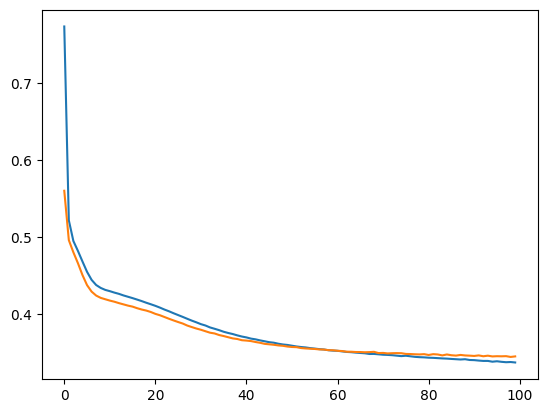

In [90]:
import matplotlib.pyplot as plt
plt.plot(history_model.history["loss"])
plt.plot(history_model.history["val_loss"])

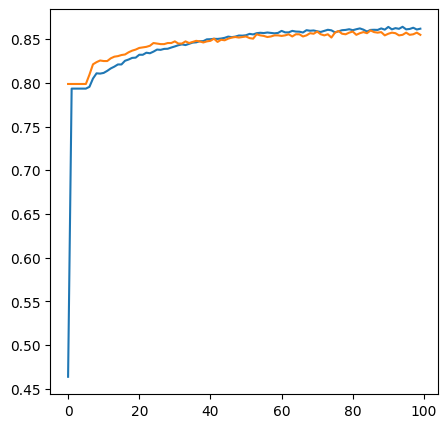

In [91]:
plt.figure(figsize=(5,5))
plt.plot(history_model.history["accuracy"])
plt.plot(history_model.history["val_accuracy"])